# KAIM Week 1 Challenges Task 3

## Business Objective

**Nova Financial Solutions** aims to enhance its predictive analytics capabilities to significantly boost its financial forecasting accuracy and operational efficiency through advanced data analysis. As a Data Analyst at Nova Financial Solutions,  your primary task is to conduct a rigorous analysis of the financial news dataset. The focus of your analysis should be two-fold:

*     **Sentiment Analysis:** Perform sentiment analysis on the ‘headline’ text to quantify the tone and sentiment expressed in financial news. This will involve using natural language processing (NLP) techniques to derive sentiment scores, which can be associated with the respective 'Stock Symbol' to understand the emotional context surrounding stock-related news.
*     **Correlation Analysis:** Establish statistical correlations between the sentiment derived from news articles and the corresponding stock price movements. This involves tracking stock price changes around the date the article was published and analyzing the impact of news sentiment on stock performance. This analysis should consider the publication date and potentially the time the article was published if such data can be inferred or is available.

Your recommendations should leverage insights from this sentiment analysis to suggest investment strategies. These strategies should utilize the relationship between news sentiment and stock price fluctuations to predict future movements. The final report should provide clear, actionable insights based on your analysis, offering innovative strategies to use news sentiment as a predictive tool for stock market trends.


## Dataset Overview

### Financial News and Stock Price Integration Dataset

**FNSPID (Financial News and Stock Price Integration Dataset)**, is a comprehensive financial dataset designed to enhance stock market predictions by combining quantitative and qualitative data.

- The structure of the [data](https://drive.google.com/file/d/1tLHusoOQOm1cU_7DtLNbykgFgJ_piIpd/view?usp=drive_link) is as follows
    - `headline`: Article release headline, the title of the news article, which often includes key financial actions like stocks hitting highs, price target changes, or company earnings.
    - `url`: The direct link to the full news article.
    - `publisher`: Author/creator of article.
    - `date`: The publication date and time, including timezone information(UTC-4 timezone).
    - `stock`: Stock ticker symbol (unique series of letters assigned to a publicly traded company). For example (AAPL: Apple)


### Correlation between news and stock movement

**Tasks:**
- Date Alignment: Ensure that both datasets (news and stock prices) are aligned by dates. This might involve normalizing timestamps.
- Sentiment Analysis: Conduct sentiment analysis on news headlines to quantify the tone of each article (positive, negative, neutral).Tools: Use Python libraries like nltk, TextBlob for sentiment analysis.
- Analysis:
    - Calculate Daily Stock Returns: Compute the percentage change in daily closing prices to represent stock movements.
    - Correlation Analysis: Use statistical methods to test the correlation between daily news sentiment scores and stock returns.

**KPIs**
- Proactivity to self-learn - sharing references.
- Sentiment Analysis
- Correlation Strength


### Minimum Essential To Do:
- Merge the necessary branches from task-2 into the main branch using a Pull Request (PR)
- Create at least one new branch called "task-3" for the ongoing development of the dashboard.
- Commit your work with a descriptive commit message.
- Data preparation
    - Normalize Dates: Align dates in both news and stock datasets to ensure each news item matches the corresponding stock trading day.
    - Perform Sentiment Analysis: Use a simple and effective sentiment analysis tool to assign sentiment scores to headlines.
- Calculate Stock Movements
    - Compute Daily Returns: Calculate daily percentage changes in stock prices to represent movements.
- Correlation Analysis
    - Aggregate Sentiments: Compute average daily sentiment scores if multiple articles appear on the same day.
    - Calculate Correlation: Determine the Pearson correlation coefficient between average daily sentiment scores and stock daily returns.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob

In [2]:
apple = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/AAPL_historical_data.csv'
amazon = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/AMZN_historical_data.csv'
google = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/GOOG_historical_data.csv'
meta = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/META_historical_data.csv'
microsoft = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/MSFT_historical_data.csv'
nvidia = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/NVDA_historical_data.csv'
tesla = '/kaggle/input/kaim-w1/yfinance_data/yfinance_data/TSLA_historical_data.csv'
news_file_path = '/kaggle/input/kaim-w1/raw_analyst_ratings/raw_analyst_ratings.csv' 

In [3]:
apple = pd.read_csv(apple)
amazon = pd.read_csv(amazon)
google = pd.read_csv(google)
meta = pd.read_csv(meta)
microsoft = pd.read_csv(microsoft)
nvidia = pd.read_csv(nvidia)
tesla = pd.read_csv(tesla)
news_df = pd.read_csv(news_file_path)

In [4]:
# Add a 'Company' column to each dataframe
apple['Company'] = 'Apple'
amazon['Company'] = 'Amazon'
google['Company'] = 'Google'
meta['Company'] = 'Meta'
microsoft['Company'] = 'Microsoft'
nvidia['Company'] = 'Nvidia'
tesla['Company'] = 'Tesla'

# Concatenate the dataframes
stock_df = pd.concat([apple, amazon, google, meta, microsoft, nvidia, tesla])

In [5]:
news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [6]:
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,Apple
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,Apple
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,Apple


In [7]:
news_df.shape, stock_df.shape

((1407328, 6), (45428, 10))

In [8]:
news_df= news_df.drop(news_df.columns[0], axis=1)

#### 2. **Data Preparation**

**Load and Normalize Data:**

1. **Load Datasets:**

In [9]:
# Convert 'date' columns to datetime
news_df['date'] = pd.to_datetime(news_df['date'],  errors='coerce').dt.tz_localize(None)
stock_df['Date'] = pd.to_datetime(stock_df['Date'],  errors='coerce').dt.tz_localize(None)

In [10]:
news_df.head(1)

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54,A


In [11]:
stock_df.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple


In [12]:
news_df.columns, stock_df.columns

(Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object'),
 Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Dividends', 'Stock Splits', 'Company'],
       dtype='object'))

In [13]:
# Rename 'Date' column to 'date' in stock_df and convert to datetime format
stock_df.rename(columns={'Date': 'date'}, inplace=True)


In [14]:
# Format 'date' column to 'yyyy-mm-dd' format
news_df['date'] = news_df['date'].dt.strftime('%Y-%m-%d')
stock_df['date'] = stock_df['date'].dt.strftime('%Y-%m-%d')

In [16]:
news_df.head(2)

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A


In [17]:
stock_df.head(2)

,date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,Apple
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,Apple


In [18]:
# Merge the two DataFrames on the 'date' column
merged_df = pd.merge(news_df, stock_df, on='date')
merged_df.head()

,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,Apple
1,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,Amazon
2,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0,Google
3,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,Meta
4,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,Microsoft


In [19]:
merged_df.shape

(384804, 14)

In [20]:
merged_df.isnull().sum()

headline        0
url             0
publisher       0
date            0
stock           0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
Company         0
dtype: int64

In [21]:
merged_df.duplicated().sum()

0

In [22]:
merged_df.describe()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,384804.000000,384804.000000,384804.000000,384804.000000,384804.000000,3.848040e+05,384804.000000,384804.000000
mean,76.167291,77.335021,75.128625,76.265298,74.980180,1.551286e+08,0.001746,0.000099
std,62.557257,63.479679,61.735837,62.655100,61.898823,2.029620e+08,0.025952,0.020775
min,0.287250,0.290750,0.278750,0.284500,0.260951,1.584340e+05,0.000000,0.000000
25%,24.754999,25.124666,24.166668,24.723499,23.328667,3.227350e+07,0.000000,0.000000
50%,61.566666,62.957500,60.610668,61.238499,60.253620,7.586440e+07,0.000000,0.000000
75%,116.500504,117.872498,115.300003,115.889999,115.799500,1.896200e+08,0.000000,0.000000
max,240.960007,241.210007,235.279999,238.669998,238.180557,3.692928e+09,0.510000,7.000000


In [23]:
def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

In [25]:
merged_df['sentiment'] = merged_df['headline'].apply(analyze_sentiment)

In [26]:
# Save the sentimented dataset to a CSV file
merged_df.to_csv('sentimented_df.csv', index=False)


In [27]:
merged_df.head()

,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,Apple,0.0
1,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,Amazon,0.0
2,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0,Google,0.0
3,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,226.710007,231.350006,225.309998,230.770004,230.296753,16750400,0.0,0.0,Meta,0.0
4,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,182.619995,187.729996,182.009995,187.199997,180.403564,39893600,0.0,0.0,Microsoft,0.0


In [ ]:
# merged_df = pd.read_csv('sentimented_df.csv')

In [30]:
# Calculate daily stock returns
merged_df['Daily Return'] = merged_df['Close'].pct_change() * 100

In [31]:
merged_df.head(2)

,headline,url,publisher,date,stock,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Company,sentiment,Daily Return
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,Apple,0.0,NaN
1,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,122.225502,124.432503,121.856499,124.150002,124.150002,66128000,0.0,0.0,Amazon,0.0,49.803923


In [32]:
# Aggregate sentiments by date
daily_sentiment = merged_df.groupby('date')['sentiment'].mean().reset_index()
daily_sentiment.columns = ['date', 'Average Sentiment']


In [33]:
daily_sentiment.head()

,date,Average Sentiment
0,2011-04-27,0.000000
1,2011-04-28,0.068182
2,2011-04-29,0.166667
3,2011-05-02,-0.009259
4,2011-05-03,0.000000


In [34]:
# Merge sentiment data with stock data
daily_df = pd.merge(merged_df[['date', 'Daily Return']], daily_sentiment, on='date', how='inner')


In [35]:
daily_df.head()

,date,Daily Return,Average Sentiment
0,2020-06-05,NaN,0.110735
1,2020-06-05,49.803923,0.110735
2,2020-06-05,-42.070478,0.110735
3,2020-06-05,220.872638,0.110735
4,2020-06-05,-18.880273,0.110735


In [36]:
# Calculate correlation
correlation = daily_df[['Average Sentiment', 'Daily Return']].corr().iloc[0, 1]
print(f'Pearson correlation coefficient: {correlation}')

Pearson correlation coefficient: -0.0017119695872904633


#### 5. **Visualizations**

Visualize the relationship between sentiment scores and stock returns.


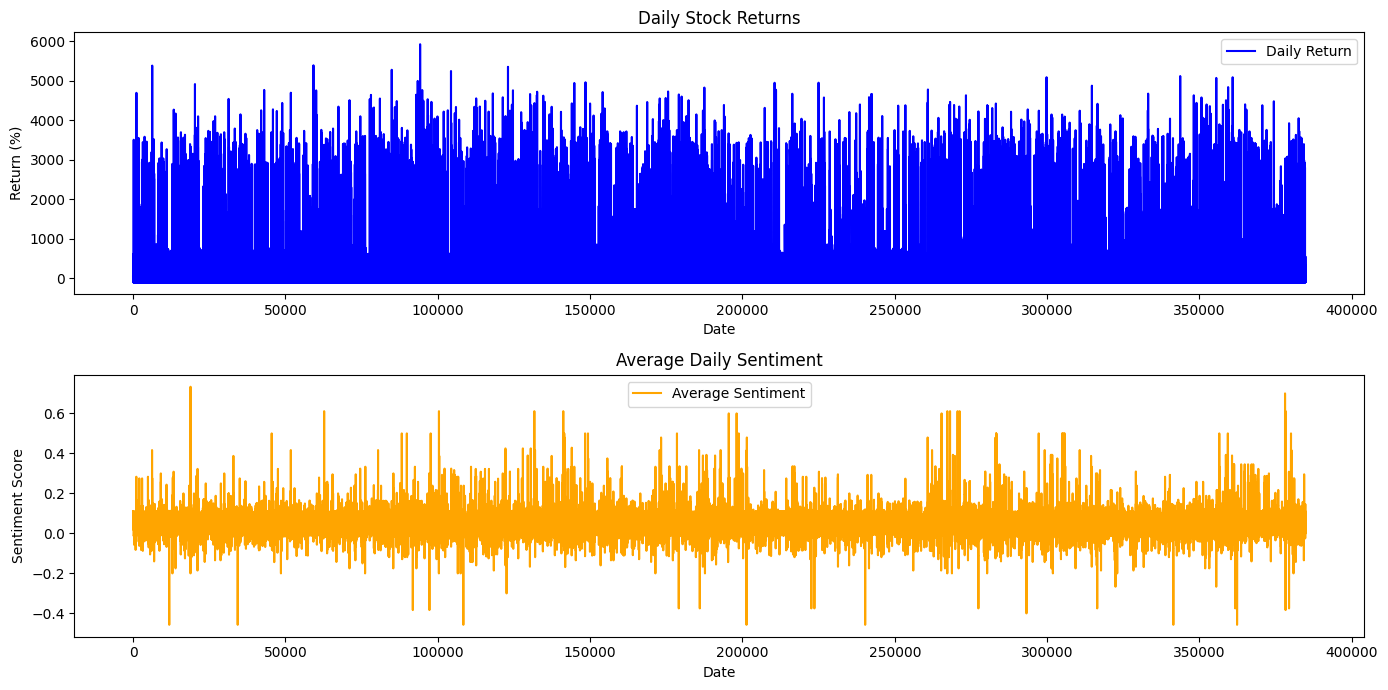

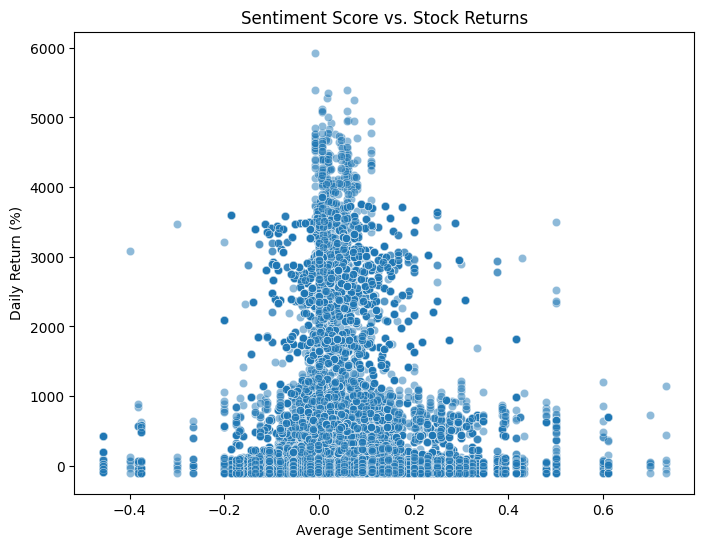

In [37]:
# Plot daily returns and average sentiment
plt.figure(figsize=(14, 7))

# Plot stock returns
plt.subplot(2, 1, 1)
plt.plot(daily_df.index, daily_df['Daily Return'], label='Daily Return', color='blue')
plt.title('Daily Stock Returns')
plt.xlabel('Date')
plt.ylabel('Return (%)')
plt.legend()

# Plot average sentiment
plt.subplot(2, 1, 2)
plt.plot(daily_df.index, daily_df['Average Sentiment'], label='Average Sentiment', color='orange')
plt.title('Average Daily Sentiment')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.legend()

plt.tight_layout()
plt.show()

# Scatter plot to visualize correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daily_df, x='Average Sentiment', y='Daily Return', alpha=0.5)
plt.title('Sentiment Score vs. Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Return (%)')
plt.show()